In [109]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [110]:
data = pd.read_csv("C:/Users/Administrator/Desktop/Data Mining/heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


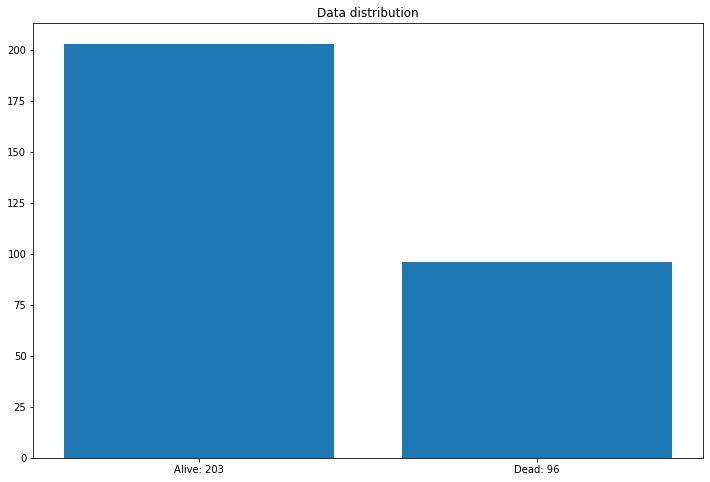

In [111]:

def counter(data):
    death = list(data['DEATH_EVENT'])
    death_count =[death.count(0), death.count(1)]
    plt.figure(figsize=(12, 8))
    plt.bar(x= ['Alive: '+str(death_count[0]),'Dead: '+str(death_count[1])], height = death_count)
    plt.title("Data distribution")
    plt.show()
                        
counter(data)

# ML Algorithms

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score

In [113]:
x = data[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","serum_sodium","time"]]
y = data["DEATH_EVENT"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
# Data scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x.shape

(299, 6)

In [114]:
from sklearn.model_selection import GridSearchCV

def grid_search_LR():
    logistic = LogisticRegression()
    penalty = ['l1', 'l2']
    C = np.logspace(0, 4, 10)
    hyperparameters = dict(C=C, penalty=penalty)
    clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
    return clf



In [115]:
# Logisitic Regression
def Logistic_Regression(x_train_scaled, y_train):
    lr_model = grid_search_LR()
    lr_model.fit(x_train_scaled, y_train)
    lr_prediction = lr_model.predict(x_test_scaled)
    lr_accuracy = (round(accuracy_score(lr_prediction, y_test), 4) * 100) #percentage
    lr_accuracy_list = []
    lr_accuracy_list.append(lr_accuracy)
    print("Logistic Regression Model accuracy "+str(lr_accuracy_list[0])+"%")
    return lr_accuracy_list[0]

In [116]:
# SVM 
def SVM(x_train_scaled, y_train):
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
    grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
    svc_model = grid
    svc_model.fit(x_train_scaled, y_train)
    svc_prediction = svc_model.predict(x_test_scaled)
    svc_accuracy = (round(accuracy_score(svc_prediction, y_test), 4) * 100) #percentage
    svm_accuracy_list=[]
    svm_accuracy_list.append(svc_accuracy)
    print("SVM Model accuracy "+str(svm_accuracy_list[0])+"%")
    return svm_accuracy_list[0]

In [117]:
# We use this program to find the optimal value of k
def KNNs(x_train_scaled, y_train):
    knn_list = []
    for k in range(1,50):
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(x_train_scaled, y_train)
        knn_prediction = knn_model.predict(x_test_scaled)
        knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100)
        knn_list.append(knn_accuracy)
    k = np.arange(1,50)
    if knn_list.index(max(knn_list))== 0:
        neighbors = 2
    else:
        neighbors = knn_list.index(max(knn_list))
    knn_model = KNeighborsClassifier(n_neighbors=neighbors)
    knn_model.fit(x_train_scaled, y_train)
    knn_prediction = knn_model.predict(x_test_scaled)
    knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100) #percentage
    kkn_accuracy_list=[]
    kkn_accuracy_list.append(knn_accuracy)
    print("KNNs Model accuracy "+str(kkn_accuracy_list[0])+"%")
    return kkn_accuracy_list[0]

In [118]:
# Decion Tree
def Decision_Tree(x_train_scaled, y_train):
    tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
    dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=2)
    dt_model = clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
    dt_model.fit(x_train_scaled, y_train)
    dt_prediction = dt_model.predict(x_test_scaled)
    dt_accuracy = (round(accuracy_score(dt_prediction, y_test), 4) * 100) #percentage
    dt_accuracy_list=[]
    dt_accuracy_list.append(dt_accuracy)
    print("Decision Tree Model accuracy "+str(dt_accuracy_list[0])+"%")
    return dt_accuracy_list[0]

In [119]:
# Naive Bayes
def Naive_Bayes(x_train_scaled, y_train):
    nb_model = GaussianNB()
    nb_model.fit(x_train_scaled, y_train)
    nb_prediction = nb_model.predict(x_test_scaled)
    nb_accuracy = (round(accuracy_score(nb_prediction, y_test), 4) * 100) #percentage
    nb_accuracy_list=[]
    nb_accuracy_list.append(nb_accuracy)
    print("Naive Bayes Model accuracy "+str(nb_accuracy_list[0])+"%")
    return nb_accuracy_list[0]

In [120]:
# Random Forrest
def Random_Forrest(x_train_scaled, y_train):
    rf_model = RandomForestClassifier()
    rf_model.fit(x_train_scaled, y_train)
    rf_prediction = rf_model.predict(x_test_scaled)
    rf_accuracy = (round(accuracy_score(rf_prediction, y_test), 4) * 100) #percentage
    rf_accuracy_list=[]
    rf_accuracy_list.append(rf_accuracy)
    print("Random Forrest Model accuracy "+str(rf_accuracy_list[0])+"%")
    return rf_accuracy_list[0]

C:\Users\Administrator\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Administrator\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\

Logistic Regression Model accuracy 87.78%
SVM Model accuracy 90.0%
KNNs Model accuracy 84.44%
Decision Tree Model accuracy 85.56%
Naive Bayes Model accuracy 82.22%
Random Forrest Model accuracy 87.78%


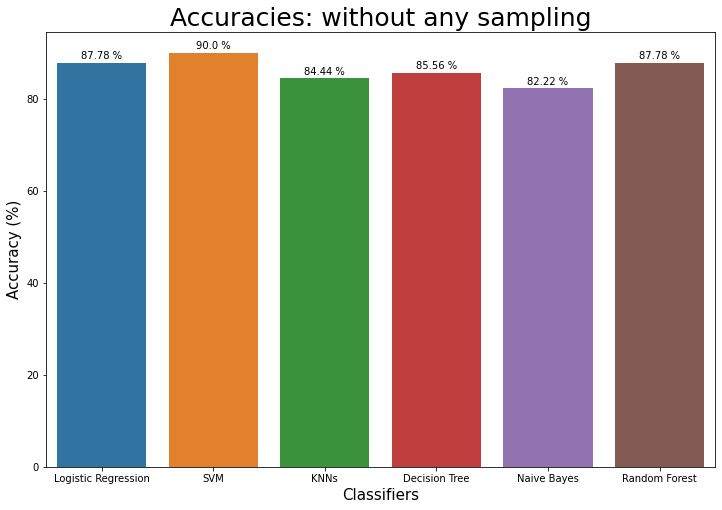

In [121]:
# Without SMOTE
import seaborn as sns
accuracies = [Logistic_Regression(x_train_scaled, y_train),SVM(x_train_scaled, y_train),KNNs(x_train_scaled, y_train),Decision_Tree(x_train_scaled, y_train),Naive_Bayes(x_train_scaled, y_train),Random_Forrest(x_train_scaled, y_train)]
models = ["Logistic Regression","SVM","KNNs","Decision Tree","Naive Bayes","Random Forest"]

def accuracies_plot(models,accuracies, type_data):
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=models, y=accuracies)
    plt.xlabel("Classifiers", fontsize=15)
    plt.ylabel("Accuracy (%)", fontsize=15)
    plt.title("Accuracies: "+ type_data, fontsize=25)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x()
        y = p.get_y()
        ax.annotate(f"{height} %", (x + width/2, y+ height*1.01), ha="center")
    plt.show()
    
accuracies_plot(models,accuracies, "without any sampling")

In [122]:
# Splitting data according death outcome

def split_data(data):
    keys = list(data.keys())
    dead_list=[]
    alive_list=[]
    for i in range(len(data['DEATH_EVENT'])):
        if int(data.iloc[i]['DEATH_EVENT'])==1:
            dead_list.append(list(data.iloc[i]))
        else:
            alive_list.append(list(data.iloc[i]))
    alive_data=pd.DataFrame(alive_list, columns = keys)
    dead_data=pd.DataFrame(dead_list, columns = keys)
    return dead_data, alive_data
            

In [123]:
dead_data, alive_data = split_data(data)

In [124]:
alive_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,49.0,1.0,80.0,0.0,30.0,1.0,427000.0,1.0,138.0,0.0,0.0,12.0,0.0
1,65.0,1.0,52.0,0.0,25.0,1.0,276000.0,1.3,137.0,0.0,0.0,16.0,0.0
2,53.0,0.0,63.0,1.0,60.0,0.0,368000.0,0.8,135.0,1.0,0.0,22.0,0.0
3,50.0,1.0,159.0,1.0,30.0,0.0,302000.0,1.2,138.0,0.0,0.0,29.0,0.0
4,60.0,0.0,2656.0,1.0,30.0,0.0,305000.0,2.3,137.0,1.0,0.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,62.0,0.0,61.0,1.0,38.0,1.0,155000.0,1.1,143.0,1.0,1.0,270.0,0.0
199,55.0,0.0,1820.0,0.0,38.0,0.0,270000.0,1.2,139.0,0.0,0.0,271.0,0.0
200,45.0,0.0,2060.0,1.0,60.0,0.0,742000.0,0.8,138.0,0.0,0.0,278.0,0.0
201,45.0,0.0,2413.0,0.0,38.0,0.0,140000.0,1.4,140.0,1.0,1.0,280.0,0.0


In [125]:
# Under sampling data

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


In [126]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [127]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=11)
X_res, y_res = sm.fit_resample(x_train_scaled, y_train)

In [128]:
a = 0
b = 0

for i in y_res:
    if i==0:
        a=a+1
    else:
        b=b+1
print("dead :  " + str(b))
print("alive :  " +str(a))

dead :  137
alive :  137


C:\Users\Administrator\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Administrator\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\

Logistic Regression Model accuracy 84.44%
SVM Model accuracy 80.0%
KNNs Model accuracy 81.11%
Decision Tree Model accuracy 78.89%
Naive Bayes Model accuracy 84.44%
Random Forrest Model accuracy 87.78%


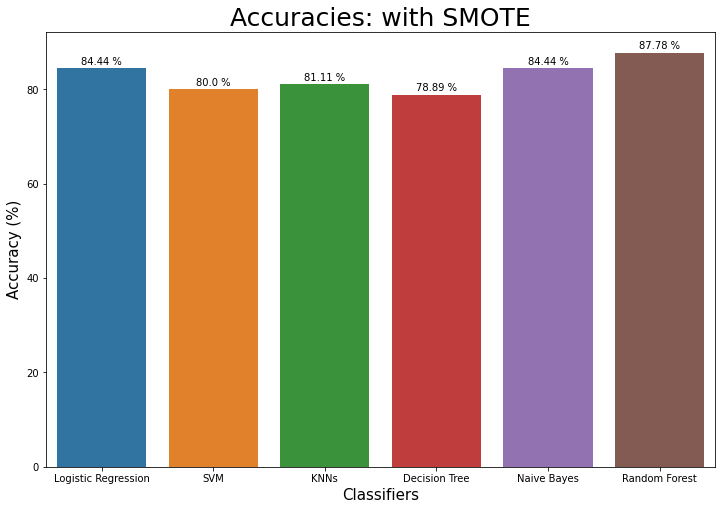

In [129]:
# With SMOTE
import seaborn as sns
accuracies_smote = [Logistic_Regression(X_res, y_res),SVM(X_res, y_res),KNNs(X_res, y_res),Decision_Tree(X_res, y_res),Naive_Bayes(X_res, y_res),Random_Forrest(X_res, y_res)]
models_smote = ["Logistic Regression","SVM","KNNs","Decision Tree","Naive Bayes","Random Forest"]


    
accuracies_plot(models_smote,accuracies_smote, "with SMOTE")

In [130]:
[print(models_smote[i]+" difference in accuracy:  "+str(round(accuracies_smote[i]-accuracies[i],2))+"%") for i in range(len(accuracies_smote))]

Logistic Regression difference in accuracy:  -3.34%
SVM difference in accuracy:  -10.0%
KNNs difference in accuracy:  -3.33%
Decision Tree difference in accuracy:  -6.67%
Naive Bayes difference in accuracy:  2.22%
Random Forest difference in accuracy:  0.0%


[None, None, None, None, None, None]

In [131]:
import random as rd
def under_sampling(data):
    dead_data, alive_data = split_data(data)
    random_samples=[]
    for i in range(len(dead_data)):
        randy =  rd.randrange(len(alive_data))
        while randy in random_samples:
            randy =  rd.randrange(len(alive_data))
        random_samples.append(randy)
    return pd.concat([alive_data.loc[random_samples,:],dead_data ]).reset_index()
        
def over_sampling(data):
    dead_data, alive_data = split_data(data)
    random_samples=[]
    for i in range(len(alive_data)):
        randy =  rd.randrange(len(dead_data))
        while random_samples.count(randy)>3:
            randy =  rd.randrange(len(dead_data))
        random_samples.append(randy)
    return pd.concat([dead_data.loc[random_samples,:],alive_data ]).reset_index()
        

In [132]:
US_data = under_sampling(data)
OS_data = over_sampling(data)
print("undersampled data size:  " , len(US_data))
print("oversampled data size:  " , len(OS_data))

undersampled data size:   192
oversampled data size:   406


In [133]:
x = US_data[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","serum_sodium","time"]]
y = US_data["DEATH_EVENT"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
# Data scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

C:\Users\Administrator\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Administrator\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\

Logistic Regression Model accuracy 82.76%
SVM Model accuracy 84.48%
KNNs Model accuracy 81.03%
Decision Tree Model accuracy 70.69%
Naive Bayes Model accuracy 81.03%
Random Forrest Model accuracy 81.03%


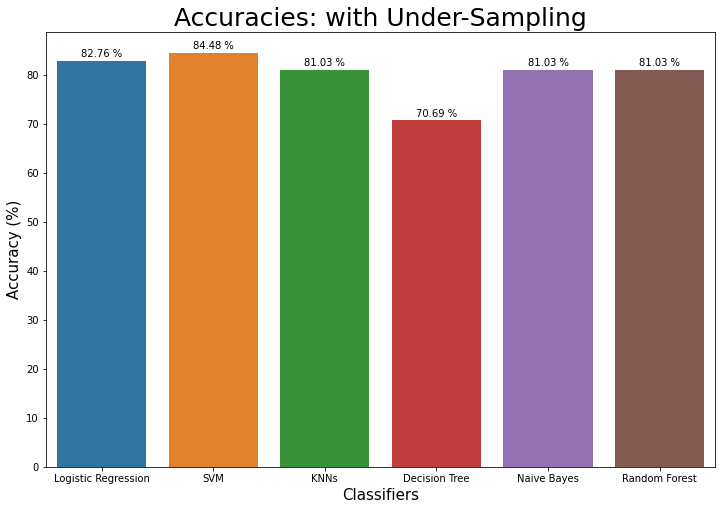

In [134]:
# With Undersampling
import seaborn as sns
accuracies_under_sampling = [Logistic_Regression(x_train_scaled, y_train),SVM(x_train_scaled, y_train),KNNs(x_train_scaled, y_train),Decision_Tree(x_train_scaled, y_train),Naive_Bayes(x_train_scaled, y_train),Random_Forrest(x_train_scaled, y_train)]
models_under_sampling = ["Logistic Regression","SVM","KNNs","Decision Tree","Naive Bayes","Random Forest"]

    
accuracies_plot(models_under_sampling, accuracies_under_sampling, "with Under-Sampling")

In [135]:
[print(models_smote[i]+" difference in accuracy:  "+str(round(accuracies_under_sampling[i]-accuracies[i],4))+"%") for i in range(len(accuracies_smote))]

Logistic Regression difference in accuracy:  -5.02%
SVM difference in accuracy:  -5.52%
KNNs difference in accuracy:  -3.41%
Decision Tree difference in accuracy:  -14.87%
Naive Bayes difference in accuracy:  -1.19%
Random Forest difference in accuracy:  -6.75%


[None, None, None, None, None, None]

In [136]:
x_OS = OS_data[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","serum_sodium","time"]]
y_OS = OS_data["DEATH_EVENT"]

x_train_OS, x_test_OS, y_train_OS, y_test_OS = train_test_split(x_OS, y_OS, test_size=0.3, random_state=2)
# Data scaling
scaler = StandardScaler()
x_OS_train_scaled = scaler.fit_transform(x_train_OS)
x_OS_test_scaled = scaler.transform(x_test_OS)

C:\Users\Administrator\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Administrator\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\

Logistic Regression Model accuracy 82.76%
SVM Model accuracy 91.38%
KNNs Model accuracy 89.66%
Decision Tree Model accuracy 84.48%
Naive Bayes Model accuracy 75.86%
Random Forrest Model accuracy 93.10000000000001%


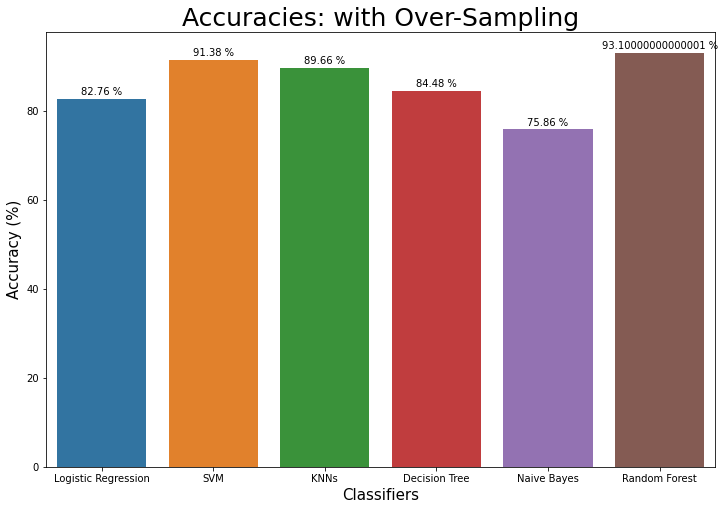

In [137]:
# With Oversampling
import seaborn as sns
accuracies_over_sampling = [Logistic_Regression(x_OS_train_scaled, y_train_OS),
                            SVM(x_OS_train_scaled, y_train_OS),
                            KNNs(x_OS_train_scaled, y_train_OS),
                            Decision_Tree(x_OS_train_scaled, y_train_OS),
                            Naive_Bayes(x_OS_train_scaled, y_train_OS),
                            Random_Forrest(x_OS_train_scaled, y_train_OS)]
models_over_sampling = ["Logistic Regression","SVM","KNNs","Decision Tree","Naive Bayes","Random Forest"]

    
accuracies_plot(models_over_sampling , accuracies_over_sampling, "with Over-Sampling")

In [138]:
[print(models_smote[i]+" difference in accuracy:  "+str(round(accuracies_over_sampling[i]-accuracies[i],4))+"%") for i in range(len(accuracies_smote))]

Logistic Regression difference in accuracy:  -5.02%
SVM difference in accuracy:  1.38%
KNNs difference in accuracy:  5.22%
Decision Tree difference in accuracy:  -1.08%
Naive Bayes difference in accuracy:  -6.36%
Random Forest difference in accuracy:  5.32%


[None, None, None, None, None, None]